### A brief introduction to Keras 

We're going to learn a little bit about Keras by creating a model to approximate a linear function. I will walk you through all the steps and my random additions; luckily, in this case, the back prop stuff is all handled by Keras & Tensorflow, so we don't have to worry ourselves with any of that.

Keras is a wrapper around Tensorflow, Theano and CNTK; at the moment, there is no Caffe backend. It exposes a very pretty API (compared to TF's crazily complicated API) and makes life a lot easier. It also fits in better with the API signature of scikit-learn, which is a popular framework used for Machine Learning tasks.

In [1]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

import keras.backend as K

sess = tf.get_default_session()
K.set_session(sess)

/anaconda3/envs/pythontf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


The last two lines are important because they tell Keras to use a Tensorflow session that we also have a reference to. This way, we can use Tensorflow and Keras interchangeably and they all work in the same session.

#### Premise

It's important to remember that neural networks are essentially function approximators; i.e., they learn what a function is given a training set and labels. For example, a network can learn the function that maps images of handwritten digits to labels telling you what those digits are. We first define an architecture and then, using backpropagation along with training data, learn that particular function.

In this session, just to get a feel for Keras, we're going to approximate an extremely simple function: a line!

In theory, if you can solve this trivial example, you just need to create bigger and better architectures and use different loss functions (according to the use case), along with activation functions in network layers and you'll be able to solve pretty much any problems that a neural network is a good fit for.

#### A linear function

We're going to define a line as a function that takes in 3 parameters: coefficients $a$ and $b$ and an $x$ coordinate. This function will then map inputs from the domain $X$ to outputs $Y$, thus creating $(X,Y)$ pairs (points) in the Cartesian plane in the following way (I'm just being really elaborate so there's no confusion):

$$f(x) = ax + b$$

Let's define a linear function that takes in 2 coefficients and returns the point that the function maps it to. 

In [7]:
def f(a,b,x):
    return a*x + b

Next, we get our sample from the domain (which will serve as our inputs). In order to make things easy to visualize, I'm going to pull 1000 samples from the interval [-5,5]. The linspace function just creates 1000 (or whatever number you want) samples spaced linearly in an interval. This will serve as our training data, since our function maps these points to others.

In [8]:
X = np.linspace(-5,5,1000)
X = X.reshape((1000,1)) # this line is just to make sure our dimensions play nice.

Now, we're going to get our Y's, but also add some random noise to make the example just a little more interesting.

Our training labels, $Y$, are now defined by the equation $$Y = ax + b + \epsilon$$ 

or, using the function $f(x)$,

$$Y = f(x) + \epsilon$$

where $\epsilon$ is random noise sampled from a Gaussian distribution.

In [9]:
Y = f(3,2,X) + np.random.randn(X.shape[0], X.shape[1])

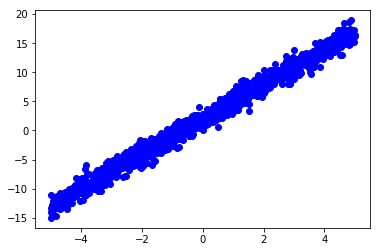

In [10]:
plt.plot(X,Y, 'bo')
plt.show()

We now have our input data (in the X vector), where we have 1000 training examples and 1000 training labels in the Y vector. Let's now construct a network that will approximate this. We are going to have 1 neuron with 1 input and 1 output. This neuron will have a weight matrix consisting of one element and a bias vector consisting of one element. As a refresher, we usually write this as:

$$ y = Wx + b $$

Look familiar?

Also, since this is a regression problem (i.e, not a classification problem), we're not going to have an activation in the last layer (which, in this case, also happens to be the first layer).

In [12]:
model = Sequential([
    Dense(1, input_shape=(1,))
])

We're also going to need a loss function; think of all of these things as parts of the network that are swappable based on the use case. For this, a good loss function could be anything that measures distance between points really well; the distance will be measured between the point that the network outputs and the actual label for that particular training sample.

Any thoughts on what we could use?

In [13]:
model.compile(loss='mse', optimizer='adam')

We now have to fit our model to our data.

In [15]:
model.fit(X, Y, epochs=200)

Epoch 1/200
1000/1000 [==============================] - 0s 27us/step - loss: 1.0673
Epoch 2/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0666
Epoch 3/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0661
Epoch 4/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0653
Epoch 5/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0650
Epoch 6/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0645
Epoch 7/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0643
Epoch 8/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0641
Epoch 9/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0638
Epoch 10/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0636
Epoch 11/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0635
Epoch 12/200
1000/1000 [==============================] - 0s 24

1000/1000 [==============================] - 0s 25us/step - loss: 1.0625
Epoch 97/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.0624
Epoch 98/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0624
Epoch 99/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0626
Epoch 100/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0624
Epoch 101/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0628
Epoch 102/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0625
Epoch 103/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0623
Epoch 104/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0627
Epoch 105/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0625
Epoch 106/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0627
Epoch 107/200
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 26us/step - loss: 1.0629
Epoch 190/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.0626
Epoch 191/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0625
Epoch 192/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.0626
Epoch 193/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0630
Epoch 194/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0628
Epoch 195/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0625
Epoch 196/200
1000/1000 [==============================] - 0s 23us/step - loss: 1.0626
Epoch 197/200
1000/1000 [==============================] - ETA: 0s - loss: 1.007 - 0s 23us/step - loss: 1.0624
Epoch 198/200
1000/1000 [==============================] - 0s 24us/step - loss: 1.0624
Epoch 199/200
1000/1000 [==============================] - 0s 25us/step - loss: 1.0629
Epoch 200/200
1000/1000 [========

Now, we have to see how well our model learned the linear function we were trying to approximate. Since we've picked an architecture that can pretty much only learn a linear function, the results will be a straight line. We're going to evaluate our model on the training set (which is a terrible practice, but shows us how well our line fitting went) and plot those on the original graph to get a sense of how well we did.

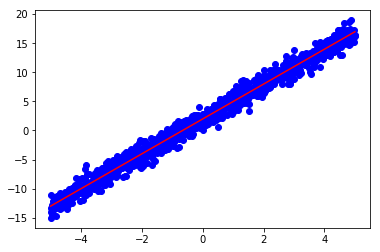

In [17]:
Y_predict = model.predict(X)

plt.plot(X,Y, 'bo',X,Y_predict,'r-')
plt.show()

Just for kicks, let's also check our weights.

In [16]:
model.get_weights()

[array([[ 2.99690032]], dtype=float32), array([ 1.98177671], dtype=float32)]

So the weights we got are really close to the coefficients we used for the linear function. We could probably get closer, but that would require more training and as it stands, since we introduced random noise, it might never get to the exact values.